<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial105_DL_terminology_Learning_rate_scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/fWnQMGRB_fM

**Understanding deep learning terminology**

This code can be used to explain learning rate scheduling


**cifar10 dataset**

60,000 32×32 pixel images divided into 10 classes.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.style.use('classic')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop



In [ ]:
#Let us extract only the 50000 training data available from cifar for this exercise.  
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset is:  (50000, 32, 32, 3)
The size of testing dataset is:  (10000, 32, 32, 3)
The size of training dataset y is:  (50000, 1)
The size of testing dataset y is:  (10000, 1)


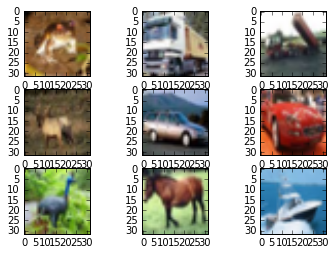

In [ ]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [ ]:
X_train = (X_train.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.


In [ ]:
# Print a few y_train values to see before and after categorical
print(y_train[0])
print(y_train[1])
print(y_train[10])

[6]
[9]
[4]


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[0])
print(y_train[1])
print(y_train[10])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Create a model with dropout
drop=0.25  #Setting to 0.5 so the training stops when it encounters overfitting. 

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model1.summary()


In [ ]:
#Functions for learning rate change

# This function keeps the initial learning rate for the first ten epochs  
# and decreases it exponentially after that.  
import math
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * math.exp(-0.1)

# Step decay
# Start with initial learning rateand drop LR by a factor after certain epochs.
decay_rate=[]
def step_decay(epoch):
  init_lrate = 0.1  #Initial LR
  drop = 0.05  #Drop factor
  epochs_drop = 2.0  # Number of epochs after which LR drops
  lr = init_lrate * math.pow(drop, math.floor((1+epoch)/(epochs_drop)))
  decay_rate.append(lr)
  return lr

decay_rate=[]
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.1
   lr = initial_lrate * math.exp(-k*epoch)
   decay_rate.append(lr)
   return lr

#NOTE: Adam optimizer uses adaptive learning rate. So you may not need to schedule learning rate unless you use SGD. 

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import LearningRateScheduler

#callbacks_list = [LearningRateScheduler(scheduler)]
callbacks_list = [LearningRateScheduler(exp_decay)]


In [ ]:
#########################################################
#Fit model....

history1 = model1.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=callbacks_list)



Epoch 1/25
782/782 [==============================] - 9s 8ms/step - loss: 2.3290 - accuracy: 0.1002 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 2/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3058 - accuracy: 0.1011 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 3/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3055 - accuracy: 0.0975 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 4/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3055 - accuracy: 0.0996 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 5/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3048 - accuracy: 0.1021 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 6/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3047 - accuracy: 0.1027 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 7/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3052 - accuracy: 0.0980 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 

Decay rate : [0.1, 0.09048374180359596, 0.0818730753077982, 0.0740818220681718, 0.06703200460356394, 0.06065306597126335, 0.05488116360940264, 0.04965853037914095, 0.044932896411722156, 0.04065696597405991, 0.036787944117144235, 0.03328710836980796, 0.030119421191220203, 0.02725317930340126, 0.024659696394160643, 0.022313016014842982, 0.02018965179946554, 0.018268352405273462, 0.016529888822158653, 0.014956861922263504, 0.013533528323661271, 0.012245642825298192, 0.011080315836233388, 0.010025884372280372, 0.009071795328941248]


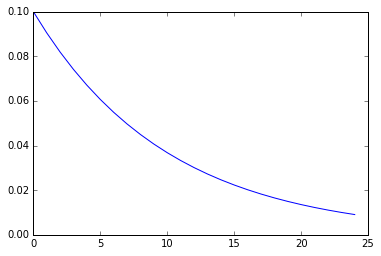

In [ ]:
print("Decay rate :", decay_rate)
plt.plot(decay_rate)

In [ ]:
_, acc = model1.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1000
Accuracy =  10.000000149011612 %


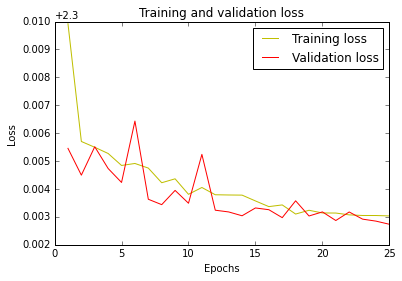

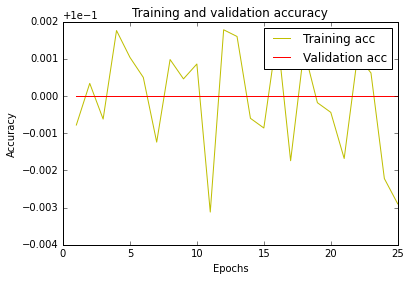

In [ ]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

history = history1

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




